In [1]:
# Necessary Imports
%matplotlib inline

import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
#Read Dataset
dataset = pd.read_csv("../Data/temp_data-AllYears-Min-Max.csv")
dataset = dataset.rename(columns = {"Min/Avg/Temp" : "Min Avg Temp", "Min/Avg/Temp.1" : "Max Avg Temp"})
dataset.head()

,Year,Min Avg Temp,Max Avg Temp
0,1850,12.833,16.783
1,1851,13.245,16.831
2,1852,13.231,16.984
3,1853,13.143,16.999
4,1854,12.983,16.775


In [3]:
# Let X = Minimum Average Temperature & y = Maximum Average Temperature
X = dataset["Min Avg Temp"].values.reshape(-1, 1)
y = dataset["Max Avg Temp"].values.reshape(-1, 1)

In [4]:
# Split Train - 80% Train & 20% Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [5]:
# Train Algorithm Using Linear Regression
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression()

In [6]:
# Retrieve Intercept:
print("The y intercept is:  ", regressor.intercept_)

# Retrieve Slope:
print("The slope is:  ", regressor.coef_)

The y intercept is:   [8.25909715]
The slope is:   [[0.64427629]]


In [7]:
# Make Predictions
y_pred = regressor.predict(X_test)

In [8]:
# Compare Actual To Predicted
actual_predicted_df = pd.DataFrame({"Actual" : y_test.flatten(), "Predicted" : y_pred.flatten(), "Error" : y_pred.flatten() - y_test.flatten()})
actual_predicted_df

,Actual,Predicted,Error
0,17.503,17.354345,-0.148655
1,16.972,17.023832,0.051832
2,16.950,16.971001,0.021001
3,16.651,16.766766,0.115766
4,17.218,17.235799,0.017799
5,16.525,16.606985,0.081985
6,16.478,16.616649,0.138649
7,16.685,16.773208,0.088208
8,17.013,17.071508,0.058508
9,16.431,16.575415,0.144415


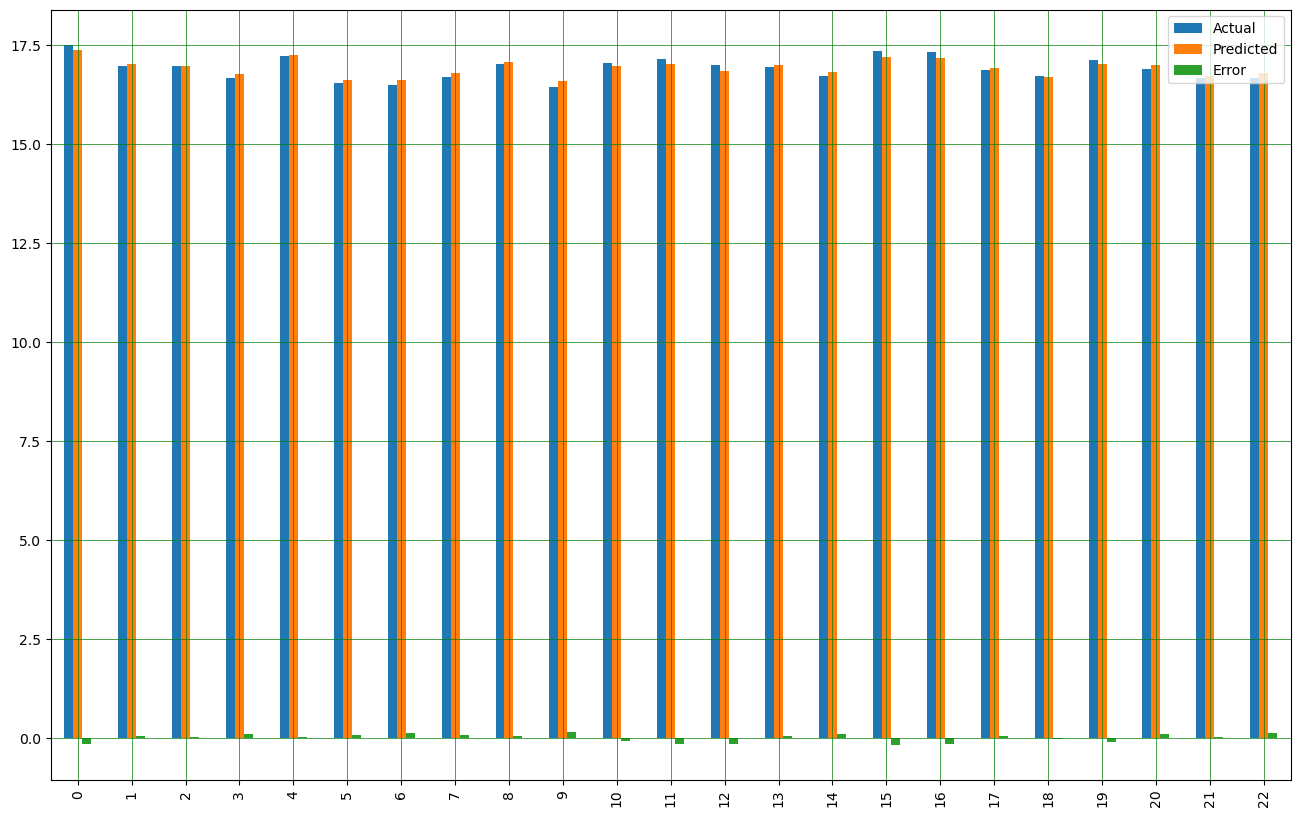

In [9]:
# Create Bar Chart
actual_predicted_df = actual_predicted_df.head(23)
actual_predicted_df.plot(kind='bar',figsize=(16,10))
plt.grid(which = "major", linestyle = "-", linewidth = "0.5", color = "green")
plt.grid(which = "minor", linestyle = ":", linewidth = "0.5", color = "black")
plt.show()

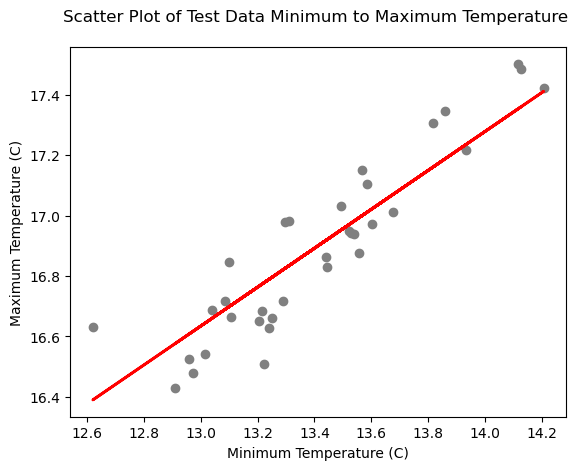

In [10]:
# Plot Straight Line With Test Data
plt.scatter(X_test, y_test,  color = "gray")
plt.plot(X_test, y_pred, color = "red", linewidth = 2)
plt.xlabel("Minimum Temperature (C)")
plt.ylabel("Maximum Temperature (C)")
plt.title("Scatter Plot of Test Data Minimum to Maximum Temperature \n")
fig1 = plt.gcf()
fig1.savefig("../Images/MinMaxTempScatterTest.png", bbox_inches = "tight")

In [11]:
# Calculate Margin Of Error
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test, y_pred))  
print("Mean Squared Error:", metrics.mean_squared_error(y_test, y_pred))  
print("Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.10347681801414128
Mean Squared Error: 0.014372946584027609
Root Mean Squared Error: 0.11988722444041988


In [12]:
x_min = X.min()
x_max = X.max()
print("Min/Max X values (Year)", x_min, x_max)

Min/Max X values (Year) 12.475 14.255


In [13]:
# Get y (Temperature Min/Max Actuals)
y_min_actual = y.min()
y_max_actual = y.max()
print("Min/Max Y values (Temperature)", y_min_actual, y_max_actual)

Min/Max Y values (Temperature) 16.430999999999997 17.611


In [14]:
# Y-Intercept = 12.82624641 & Slope = 0.00327157
y_min = 8.25909715 + 0.64427629 * x_min
y_max = 8.25909715 + 0.64427629 * x_max
print(f"Actual Smallest Max Value: {y_min_actual}")
print(f"Calculated Smallest Max Value: {y_min}")
print(f"Actual Largest Max Value: {y_max_actual}")
print(f"Calculated Largest Max Value: {y_max}")

Actual Smallest Max Value: 16.430999999999997
Calculated Smallest Max Value: 16.29644386775
Actual Largest Max Value: 17.611
Calculated Largest Max Value: 17.44325566395


In [15]:
# Predict Calculated Values
y_min_predicted = regressor.predict([[x_min]])
y_max_predicted = regressor.predict([[x_max]])
print(f"Actual Smallest Max Value: {y_min_actual}")
print(f"Predicted Smallest Max Value: {y_min_predicted}")
print(f"Actual Largest Max Value: {y_max_actual}")
print(f"Predicted Largest Max Value: {y_max_predicted}")

Actual Smallest Max Value: 16.430999999999997
Predicted Smallest Max Value: [[16.29644383]]
Actual Largest Max Value: 17.611
Predicted Largest Max Value: [[17.44325562]]


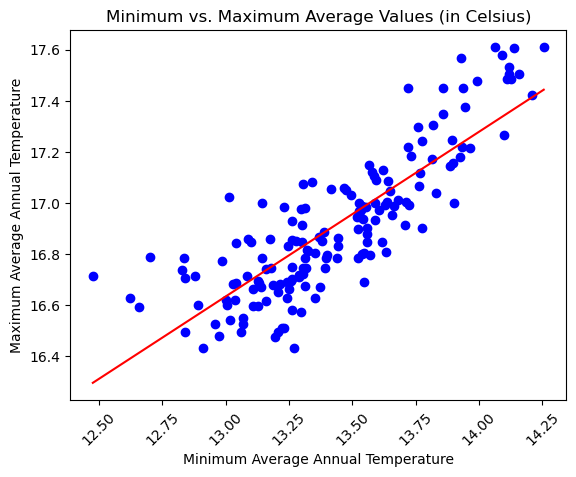

In [16]:
# Plot
plt.scatter(X, y, c = "blue")
plt.plot([x_min, x_max], [y_min, y_max], c = "red")
plt.xticks(rotation = 45)
plt.xlabel("Minimum Average Annual Temperature")
plt.ylabel("Maximum Average Annual Temperature")
plt.title("Minimum vs. Maximum Average Values (in Celsius)")
fig2 = plt.gcf()
fig2.savefig("../Images/MinVsMaxTemp.png", bbox_inches = "tight")